In [38]:
library(readr)
library(dplyr)
library(stringr)
library(lfe)
library(lubridate)
library(ggplot2)
library(ggsci)
library(doMC)
library(tidyr)
library(scales)
registerDoMC(4)


Attaching package: ‘scales’


The following object is masked from ‘package:readr’:

    col_factor




In [70]:
fp      <- '/pool001/mfzhao/'
df      <- read_rds(str_c(fp, '/PROCESSED_DATA/panel_pre_xgr.RDS'))
policy  <- read_csv(str_c(fp, 'PROCESSED_DATA/policyPeriods.csv'))
dyad    <- data.table::fread('/pool001/mfzhao/PROCESSED_DATA/dyadic_mvmt_2020.csv')

Parsed with column specification:
cols(
  key = col_character(),
  p1sdp = col_date(format = ""),
  p2shp = col_date(format = ""),
  p3rop = col_date(format = "")
)



In [40]:
cns <- colnames(df)
cns

[1] "key"                  "date"                 "mcbgv"               
  [4] "pnchd"                "pgt1hafh"             "ppthlt75"            
  [7] "pgt2kmt"              "dmcbgv"               "dpnchd"              
 [10] "dpgt1hafh"            "dppthlt75"            "dpgt2kmt"            
 [13] "pcmcbgv"              "pcpnchd"              "pcpgt1hafh"          
 [16] "pcppthlt75"           "pcpgt2kmt"            "cluster"             
 [19] "n"                    "p1sdp"                "p2shp"               
 [22] "p3rop"                "p1sdpDSS"             "p2shpDSS"            
 [25] "p3ropDSS"             "PRCP"                 "TMAX"                
 [28] "PRCP.2019"            "TMAX.2019"            "prcp01"              
 [31] "prcp02"               "prcp03"               "prcp04"              
 [34] "prcp05"               "prcp06"               "prcp07"              
 [37] "prcp08"               "prcp09"               "prcp10"              
 [40] "tmax02"               "tmax03"               "tmax04"              
 [43] "tmax05"               "tmax06"               "tmax07"              
 [46] "tmax08"               "tmax09"               "tmax10"              
 [49] "stalter_mcbgv"        "stalter_pnchd"        "stalter_pgt1hafh"    
 [52] "stalter_ppthlt75"     "stalter_pgt2kmt"      "stalter_dmcbgv"      
 [55] "stalter_dpnchd"       "stalter_dpgt1hafh"    "stalter_dppthlt75"   
 [58] "stalter_dpgt2kmt"     "stalter_pcmcbgv"      "stalter_pcpnchd"     
 [61] "stalter_pcpgt1hafh"   "stalter_pcppthlt75"   "stalter_pcpgt2kmt"   
 [64] "stalter_p1sdp"        "stalter_p2shp"        "stalter_p3rop"       
 [67] "stalter_p1sdpDSS"     "stalter_p2shpDSS"     "stalter_p3ropDSS"    
 [70] "stalter_PRCP.2019"    "stalter_TMAX.2019"    "stalter_prcp01"      
 [73] "stalter_prcp02"       "stalter_prcp03"       "stalter_prcp04"      
 [76] "stalter_prcp05"       "stalter_prcp06"       "stalter_prcp07"      
 [79] "stalter_prcp08"       "stalter_prcp09"       "stalter_prcp10"      
 [82] "stalter_tmax02"       "stalter_tmax03"       "stalter_tmax04"      
 [85] "stalter_tmax05"       "stalter_tmax06"       "stalter_tmax07"      
 [88] "stalter_tmax08"       "stalter_tmax09"       "stalter_tmax10"      
 [91] "alter_mcbgv"          "alter_pnchd"          "alter_pgt1hafh"      
 [94] "alter_ppthlt75"       "alter_pgt2kmt"        "alter_dmcbgv"        
 [97] "alter_dpnchd"         "alter_dpgt1hafh"      "alter_dppthlt75"     
[100] "alter_dpgt2kmt"       "alter_pcmcbgv"        "alter_pcpnchd"       
[103] "alter_pcpgt1hafh"     "alter_pcppthlt75"     "alter_pcpgt2kmt"     
[106] "alter_p1sdp"          "alter_p2shp"          "alter_p3rop"         
[109] "alter_p1sdpDSS"       "alter_p2shpDSS"       "alter_p3ropDSS"      
[112] "alter_PRCP.2019"      "alter_TMAX.2019"      "alter_prcp01"        
[115] "alter_prcp02"         "alter_prcp03"         "alter_prcp04"        
[118] "alter_prcp05"         "alter_prcp06"         "alter_prcp07"        
[121] "alter_prcp08"         "alter_prcp09"         "alter_prcp10"        
[124] "alter_tmax02"         "alter_tmax03"         "alter_tmax04"        
[127] "alter_tmax05"         "alter_tmax06"         "alter_tmax07"        
[130] "alter_tmax08"         "alter_tmax09"         "alter_tmax10"        
[133] "log_mcbgv"            "log_pnchd"            "log_pgt1hafh"        
[136] "log_ppthlt75"         "log_pgt2kmt"          "log_stalter_mcbgv"   
[139] "log_stalter_pnchd"    "log_stalter_pgt1hafh" "log_stalter_ppthlt75"
[142] "log_stalter_pgt2kmt"  "log_alter_mcbgv"      "log_alter_pnchd"     
[145] "log_alter_pgt1hafh"   "log_alter_ppthlt75"   "log_alter_pgt2kmt"

In [41]:
dvs <- c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd')

Joining, by = "state"



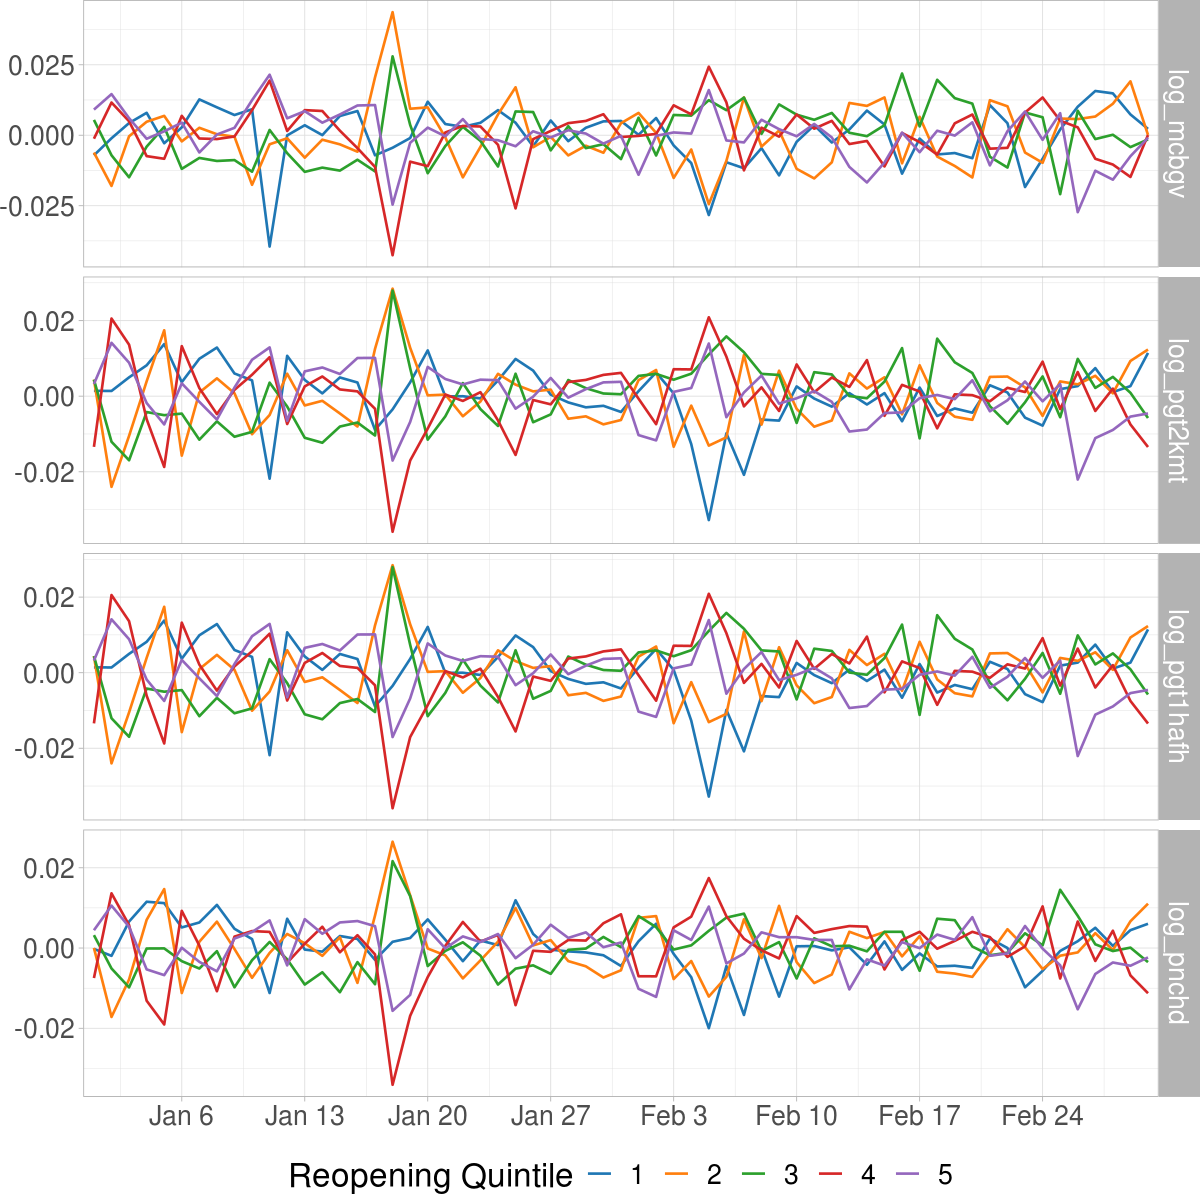

In [64]:
options(repr.plot.width=10, repr.plot.height=10)

policy %>%
    mutate(state = str_sub(key, 1, 2)) %>%
    select(state, p1sdp, p2shp, p3rop)  %>%
    distinct() %>%
    filter(state != 11) %>%
    select(state, p3rop) %>%
    mutate(q = ntile(p3rop, 5)) -> rq

rq %>%
    select(-p3rop) %>%
    inner_join(df %>%
               mutate(state = str_sub(key, 1, 2))) %>%
    filter(date <= as.Date('2020-03-01')) %>%
    group_by(date, q) %>%
    mutate(w = n/sum(n)) %>%
    summarize(log_mcbgv    = sum(log_mcbgv * w), 
              log_pgt2kmt  = sum(log_pgt1hafh * w),
              log_pgt1hafh = sum(log_pgt1hafh * w),
              log_pnchd    = sum(log_pnchd * w)) -> temp

temp %>%
    ungroup() %>%
    mutate_at(vars(matches('log')), function(x) felm(x ~ 0 | q + date, temp)$resid) %>%
    gather(key = 'dv', value = 'value', -date, -q) %>%
    mutate(dv = factor(dv, levels = c('log_mcbgv', 'log_pgt2kmt', 'log_pgt1hafh', 'log_pnchd'))) %>%
    ggplot(aes(x = date, y = value, color = as.factor(q))) + 
    geom_line(size = .75) + 
    facet_grid(dv ~ ., scales = 'free') + 
    scale_color_d3() +
    labs(color = 'Reopening Quintile') +
    scale_x_date(date_breaks = '1 week', 
                 lim = c(as.Date('2020-01-01'), as.Date('2020-03-01')), 
                 labels = date_format("%b %-d"),
                 expand = c(0.01, 0.01)) +
    theme_light() + 
    theme(text = element_text(size = 20),
          axis.title = element_blank(),
          legend.position = 'bottom',
          plot.margin = unit(c(0, 0, 0, 0), "in")) -> pt_did
p
ggsave('~/si_plots/pt_did.pdf', pt_did, device = 'pdf', width = 6.5, height = 4, scale = 2)

In [34]:
rq %>%
    group_by(q) %>%
    summarize(mro = median(p3rop))

q,mro
<int>,<date>
1,2020-04-27
2,2020-05-01
3,2020-05-06
4,2020-05-13
5,2020-05-19


In [69]:
df %>%
    select(key, date, all_of(dvs)) %>%
    gather(key = 'dv', value = 'value', -key, -date) %>%
    left_join(df %>%
              select(key, date, PRCP, TMAX)) -> dv_weather

Joining, by = c("key", "date")



In [87]:
dyad %>%
    filter(origin_cluster != destination_cluster) %>%
    mutate(state = str_pad(destination_cluster, 2, pad = '0')) %>%
    inner_join(rq) -> dyad

Joining, by = c("state", "p3rop", "q")



In [88]:
dyad %>%
    mutate(r1 = felm(log(ndotd) ~ 0 | dyad + date, .)$resid,
           r2 = felm(log(pdotd) ~ 0 | dyad + date, ., weights = .$n)$resid) %>%
    filter(date < as.Date('2020-03-01')) -> temp

In [94]:
temp %>%
    group_by(date, q) %>%
    summarize(log_ndotd = mean(log(ndotd)), log_pdotd = mean(log(pdotd))) %>%
    ungroup() %>%
    mutate(log_ndotd = felm(log_ndotd ~ 0 | q + date, .)$resid, 
           log_pdotd = felm(log_pdotd ~ 0 | q + date, .)$resid) %>%
    gather(key = 'dv', value = 'value', -date, -q) %>%
    ggplot(aes(x = date, y = value, color = as.factor(q))) + 
    geom_line(size = .75) + 
    facet_grid(dv ~ ., scales = 'free') + 
    scale_color_d3() +
    labs(color = 'Destination Reopening Quintile') +
    scale_x_date(date_breaks = '1 week', 
                 lim = c(as.Date('2020-01-01'), as.Date('2020-03-01')), 
                 labels = date_format("%b %-d"),
                 expand = c(0.01, 0.01)) +
    theme_light() + 
    theme(text = element_text(size = 20),
          axis.title = element_blank(),
          legend.position = 'bottom',
          plot.margin = unit(c(0, 0, 0, 0), "in")) -> pt_dyad

ggsave('~/si_plots/pt_dyad.pdf', pt_dyad, device = 'pdf', width = 6.5, height = 2.25, scale = 2)

Warning message:
“attributes are not identical across measure variables;
they will be dropped”


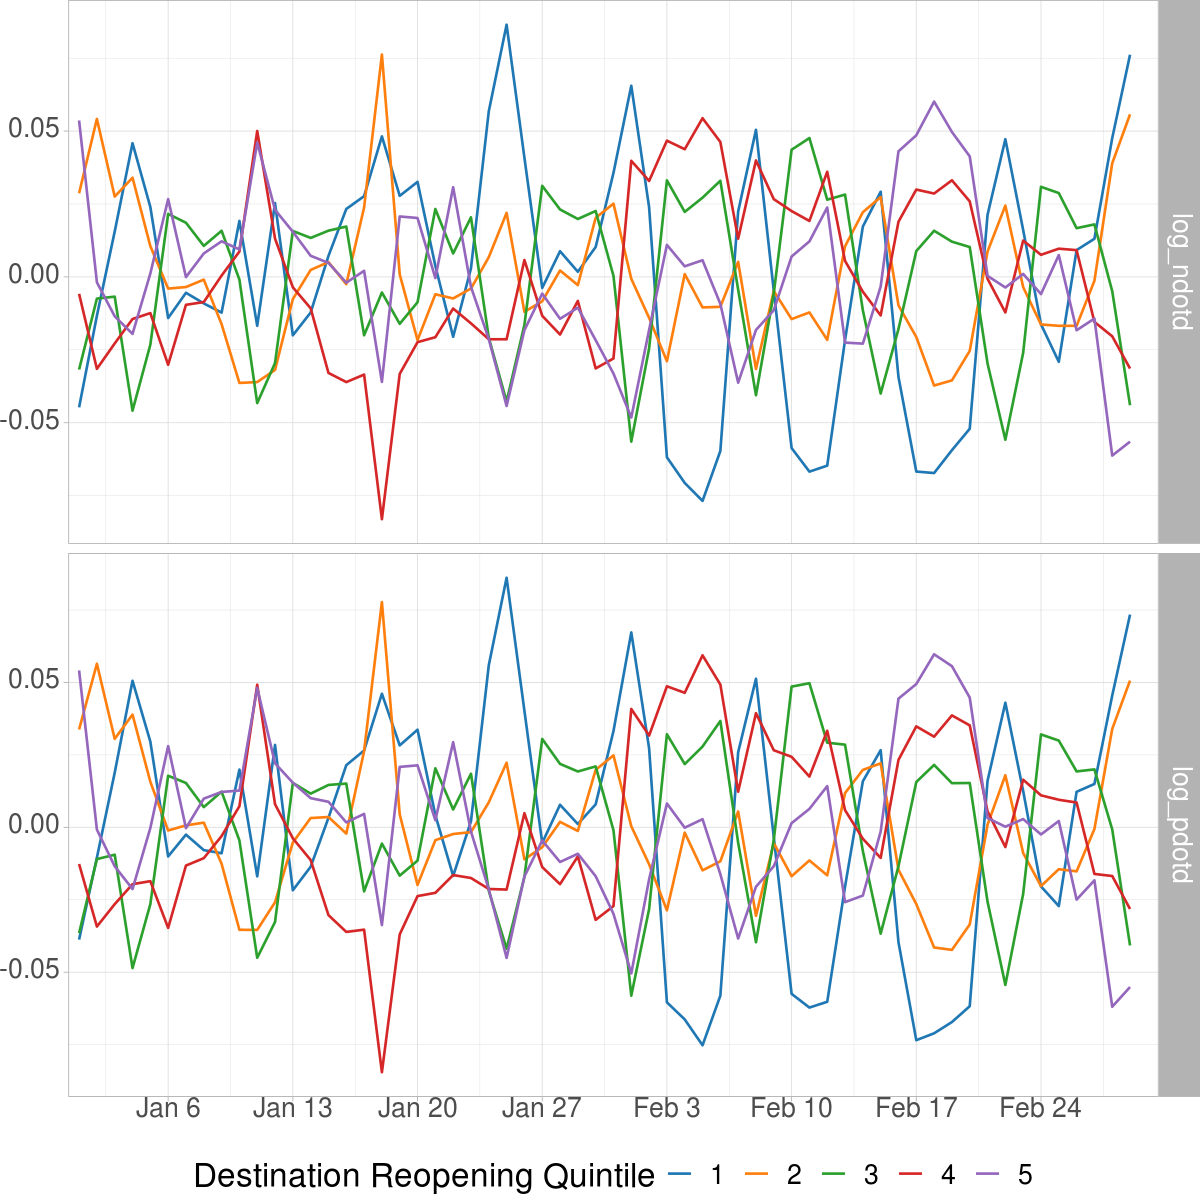

In [95]:
pt_dyad